In [1]:
# **eCommerce Transactions Dataset Analysis**

# **Step 1: Load and Explore the Dataset**
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv(r'E:\zeotopProject\Customers.csv')
products = pd.read_csv(r'E:\zeotopProject\Products.csv')
transactions = pd.read_csv(r'E:\zeotopProject\Transactions.csv')


In [3]:
# Preview the datasets
print("Customers Dataset")
print(customers.head())

print("\nProducts Dataset")
print(products.head())

print("\nTransactions Dataset")
print(transactions.head())

Customers Dataset
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      

In [4]:
# Check for missing values and data types
print("\nCustomers Dataset Info")
print(customers.info())

print("\nProducts Dataset Info")
print(products.info())

print("\nTransactions Dataset Info")
print(transactions.info())


Customers Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Col

In [5]:
# **Step 2: Exploratory Data Analysis (EDA)**

# Analyze numerical columns in Transactions dataset
print("\nTransactions Dataset Description")
print(transactions.describe())


Transactions Dataset Description
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [6]:
# Total revenue
total_revenue = transactions['TotalValue'].sum()
print(f"\nTotal Revenue: ${total_revenue}")


Total Revenue: $689995.56


In [7]:
# Customers by Region
region_distribution = customers['Region'].value_counts()
print("\nCustomer Distribution by Region")
print(region_distribution)


Customer Distribution by Region
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


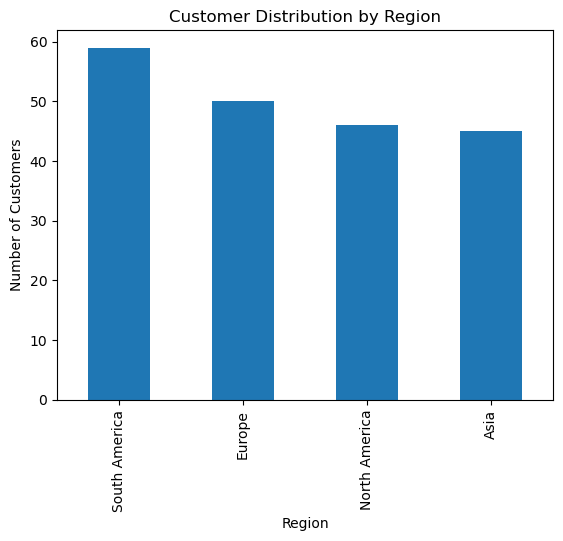

In [8]:
# Plot customer distribution by region
region_distribution.plot(kind='bar', title='Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [9]:
# Product Popularity
popular_products = transactions['ProductID'].value_counts().head(10)
print("\nTop 10 Most Popular Products")
print(popular_products)


Top 10 Most Popular Products
P059    19
P029    17
P062    16
P079    16
P054    16
P061    16
P048    15
P022    15
P096    15
P049    15
Name: ProductID, dtype: int64


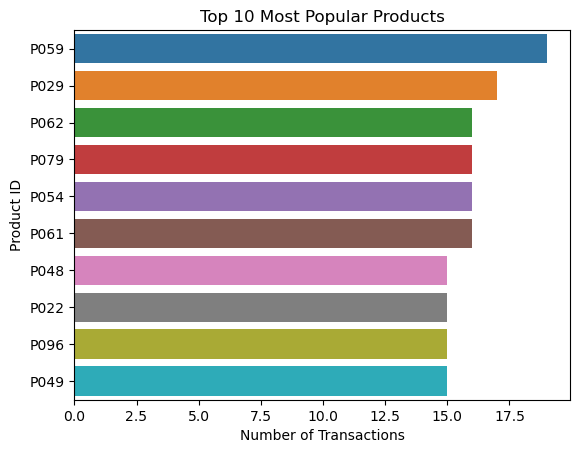

In [10]:
# Plot top 10 most popular products
sns.barplot(x=popular_products.values, y=popular_products.index)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Number of Transactions')
plt.ylabel('Product ID')
plt.show()

In [11]:
# Average transaction value
average_transaction_value = transactions['TotalValue'].mean()
print(f"\nAverage Transaction Value: ${average_transaction_value:.2f}")


Average Transaction Value: $690.00


In [12]:
# **Step 3: Build Lookalike Model**
# Recommend 3 similar customers based on profile and transaction data

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler



In [13]:
# Aggregate transaction data per customer
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TotalValue': 'TotalSpend', 'TransactionID': 'TransactionCount'}).reset_index()

# Merge with customer data
customer_data = customers.merge(customer_transactions, on='CustomerID', how='left').fillna(0)

# Normalize numerical columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(customer_data[['TotalSpend', 'TransactionCount']])

# Compute similarity scores
similarity_matrix = cosine_similarity(normalized_data)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_data['CustomerID'], columns=customer_data['CustomerID'])

# Recommend top 3 similar customers
lookalike_results = {}
for customer_id in customer_data['CustomerID'][:20]:  # First 20 customers
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:4]
    lookalike_results[customer_id] = list(similar_customers.items())

# Convert lookalike results to DataFrame
lookalike_df = pd.DataFrame({
    'CustomerID': lookalike_results.keys(),
    'Lookalikes': [str(value) for value in lookalike_results.values()]
})

# Save as CSV
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)
print("\nLookalike results saved as 'FirstName_LastName_Lookalike.csv'")


Lookalike results saved as 'FirstName_LastName_Lookalike.csv'


In [14]:
# **Step 4: Customer Segmentation (Clustering)**
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Prepare data for clustering
clustering_data = customer_data[['TotalSpend', 'TransactionCount']]
normalized_clustering_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using DB Index
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_clustering_data)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(normalized_clustering_data, labels)
    db_scores.append(db_index)


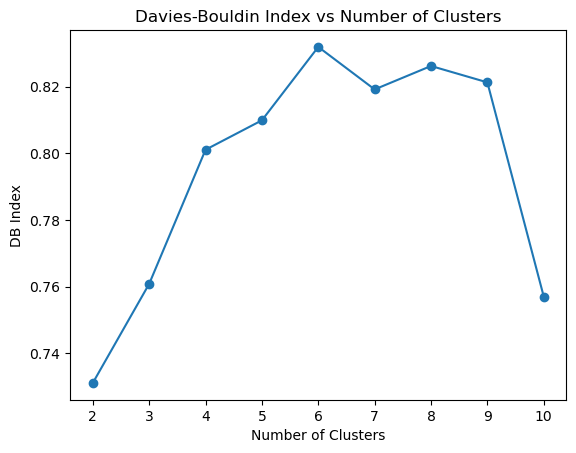

In [15]:
# Plot DB Index
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()



In [16]:
# Final clustering based on optimal number of clusters
optimal_k = db_scores.index(min(db_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(normalized_clustering_data)



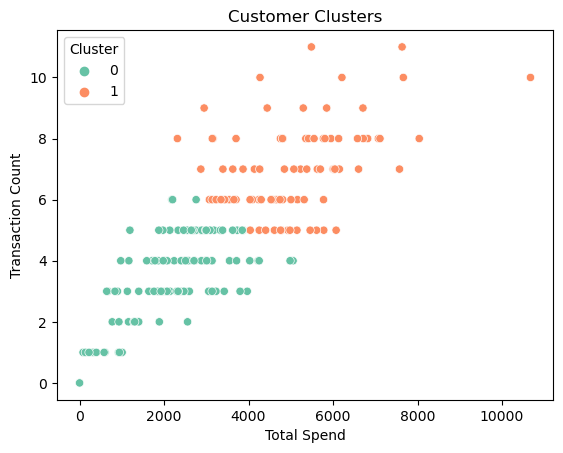

In [17]:
# Visualize clusters
sns.scatterplot(x=customer_data['TotalSpend'], y=customer_data['TransactionCount'], hue=customer_data['Cluster'], palette='Set2')
plt.title('Customer Clusters')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.show()



In [18]:
# Save clustering results
customer_data.to_csv('FirstName_LastName_Clustering.csv', index=False)
print("\nClustering results saved as 'FirstName_LastName_Clustering.csv'")


Clustering results saved as 'FirstName_LastName_Clustering.csv'
